Инициализаяция данных:

In [93]:
# Формирование датафрейма из данных
import pandas as pd

# Разделение на тестовую и тренировочную выборку
from sklearn.model_selection import train_test_split

# Модели (алгоритмы машинного обучения)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


# Подбор гиперпараметров
from sklearn.model_selection import GridSearchCV

# Работа с файлами моделей
import os
from joblib import dump, load

# Метрики
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

Чтение датасета

In [94]:
df = pd.read_csv('normalized_data.csv', encoding='ISO-8859-1').sample(frac=1, random_state=0)

Разбиение на тестовую и тренировочную выборку - выбор искомого класса - тип коробки управления

In [95]:
x = df.drop("transmission_type", axis=1)
y = df['transmission_type']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

Обучение моделей и подбор параметров с помощью Grid Search

Алгоритм Random Forest

In [96]:
# Сетка параметров для перебора 
param_grid = {
    'n_estimators' : [10, 50, 100],
    'criterion': ['gini'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
} 
# Модель случайного дерева
tree = GridSearchCV(estimator=RandomForestClassifier(),  param_grid=param_grid,
                     n_jobs=-1, verbose=3, cv=5)
# Проверяем существование модели в файле
if os.path.exists("random_forest_model.joblib"):
    # Если модель существует, то загружаем из файла
    tree = load("random_forest_model.joblib")
else:
    # Если модели нет, то обучаем и загружаем в файл
    tree.fit(x_train, y_train)
    dump(tree, "random_forest_model.joblib")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Алгоритм KNN

In [97]:
# Сетка параметров для перебора 
param_grid = {
    'n_neighbors': [10, 15],
    'algorithm': ['ball_tree', 'brute']
}
# Модель метода ближайших соседей
knn = GridSearchCV(estimator= KNeighborsClassifier(), 
                   param_grid=param_grid,
                   n_jobs=-1, verbose=3, cv=5)
# Проверяем существование модели в файле
if os.path.exists("knn_model.joblib"):
    # Если модель существует, то загружаем из файла
    knn = load("knn_model.joblib")
else:
    # Если модели нет, то обучаем и загружаем в файл
    knn.fit(x_train, y_train)
    dump(knn, "knn_model.joblib")

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Алгоритм SVM

In [98]:
# Сетка параметров для перебора 
param_grid = {
    'C': [0.1, 1],
}
# Модель метода опорных векторов
svm = GridSearchCV(LinearSVC(), param_grid, n_jobs=-1, verbose=3)
if os.path.exists("svm_model.joblib"):
    # Если модель существует, то загружаем из файла
    knn = load("svm_model.joblib")
else:
    # Если модели нет, то обучаем и загружаем в файл
    svm.fit(x_train, y_train)
    dump(svm, "svm_model.joblib") 

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\Admin\PycharmProjects\ML-Auto\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Оценка моделей

Выводим лучшие параметры для моделей

In [99]:
print("Random forest params: " + str(tree.best_params_))
print("KNN params: " + str(knn.best_params_))
print("SVM params: " + str(svm.best_params_))

Random forest params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
KNN params: {'algorithm': 'ball_tree', 'n_neighbors': 15}
SVM params: {'C': 0.1}


Функция для выведения матрицы ошибок

In [104]:
def conf_matrix_for_model(model, label):
    # Название алгоритма
    print(str(label) + " Model")
    # Предсказанные знаечения
    y_pred = model.predict(x_test.values)
    # Матрица ошибок
    matrix = confusion_matrix(y_test, y_pred)
    # Создаём фигуру
    plt.figure(figsize=(7, 5))
    # Рисуем матрицу
    sns.heatmap(matrix, annot=True)
    # Добавляем описания для двух осей
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.title(str(label) + " Model")
    # Выводим отчёт по разным метрикам
    print(classification_report(y_test, y_pred))

Применяем функцию для выведения матрицы ошибок ко всем моделям (0 - auto, 1 - manual)

Random Forest Model


C:\Users\Admin\PycharmProjects\ML-Auto\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

   Automatic       0.88      0.87      0.88     23011
      Manual       0.88      0.89      0.88     23627

    accuracy                           0.88     46638
   macro avg       0.88      0.88      0.88     46638
weighted avg       0.88      0.88      0.88     46638

KNN Model


C:\Users\Admin\PycharmProjects\ML-Auto\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

   Automatic       0.82      0.79      0.80     23011
      Manual       0.80      0.83      0.82     23627

    accuracy                           0.81     46638
   macro avg       0.81      0.81      0.81     46638
weighted avg       0.81      0.81      0.81     46638

SVM Model


C:\Users\Admin\PycharmProjects\ML-Auto\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

   Automatic       0.81      0.72      0.76     23011
      Manual       0.76      0.83      0.79     23627

    accuracy                           0.78     46638
   macro avg       0.78      0.78      0.78     46638
weighted avg       0.78      0.78      0.78     46638


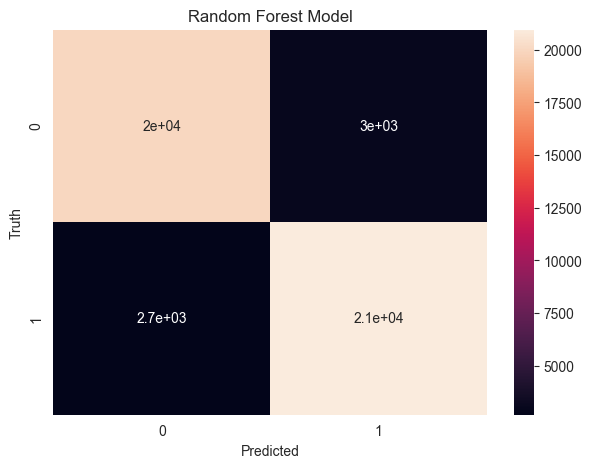

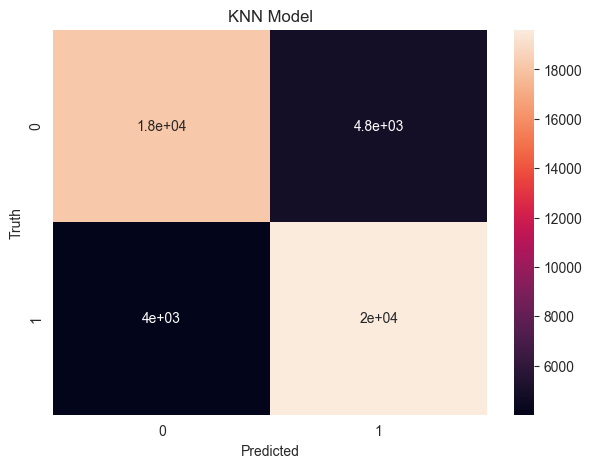

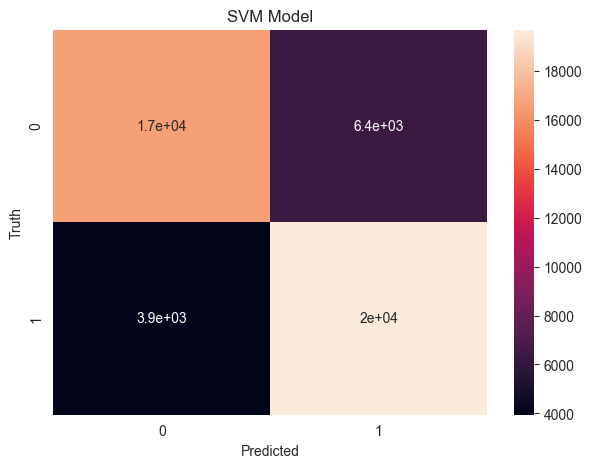

In [105]:
conf_matrix_for_model(tree, "Random Forest")
conf_matrix_for_model(knn, "KNN")
conf_matrix_for_model(svm, "SVM")

Выводим гистограмму значимости признкоав для случайного леса

Variable: price_in_euro        Importance: 0.23
Variable: power_kw             Importance: 0.17
Variable: power_ps             Importance: 0.17
Variable: fuel_consumption_g_km Importance: 0.13
Variable: mileage_in_km        Importance: 0.13
Variable: fuel_consumption_l_100km Importance: 0.1
Variable: year                 Importance: 0.07


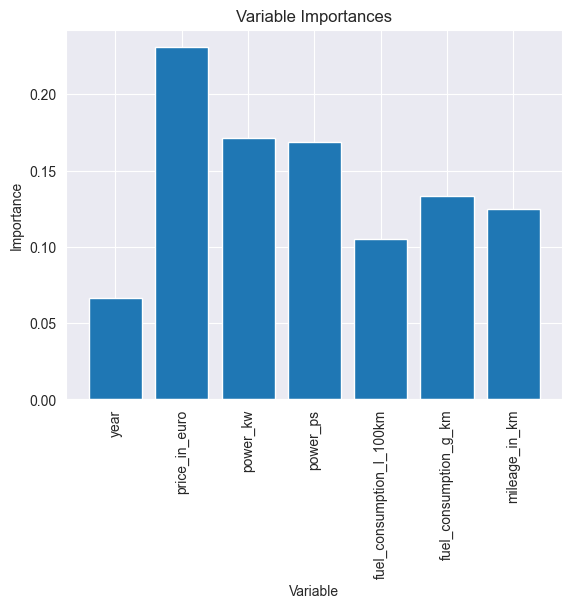

In [106]:
# Забиреам из моедли значения значимости
importances = tree.best_estimator_.feature_importances_
# Признаки в датасете
feature_list = list(x.columns)
# Преобразуем данные для вывода на график
feature_importance= [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]
x_values = list(range(len(importances)))
# Рисуем гистограмму
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

Таким образом модель случайного леса показала себя наилучшим образом, кроме того, наибольшее влияние на коробку оказывет цена автомобиля в целом 